[7324, -2197]
POLYGON ((7324 -2197, 11356 -2197, 11356 -5237, 7324 -5237, 7324 -2197))
[3619, -2167]
POLYGON ((3619 -2167, 7651 -2167, 7651 -5207, 3619 -5207, 3619 -2167))
pog
(3619.0, -2167.0) (7651.0, -2167.0) (7651.0, -5207.0) (3619.0, -5207.0) (3619.0, -2167.0)
(3619.0, -2707.6385911179173) (6850.0, -2800.0) (6800.0, -3600.0) (3619.0, -3519.1819105691056) (3619.0, -2707.6385911179173)


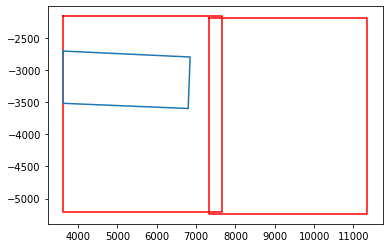

0
(3619.0, -2167.0) (7651.0, -2167.0) (7651.0, -5207.0) (3619.0, -5207.0) (3619.0, -2167.0)


In [8]:
from PIL import Image, ImageDraw, ImageOps
import math
from pain import gen_valid_cam, gen_valid_tar
import numpy as np
import random
from PIL import ImageTransform
from shapely.geometry import Point, LineString
from shapely.geometry.polygon import Polygon
from shapely import affinity
import matplotlib.pyplot as plt
import os
img = Image.open("target_images/circle,Orange,O,Purple.png")
img
bgd_img = Image.open("master_background.png")
cam, intersection, bgd, rot = gen_valid_cam()
# print(gen_valid_cam())
print(rot)
print(*cam.exterior.coords)

[3619. 2167. 7651. 2167. 7651. 5207. 3619. 5207. 3619. 2167.]


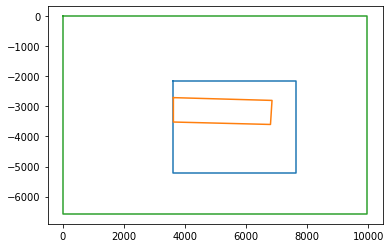

In [9]:

plt.plot(*cam.exterior.xy)
plt.plot(*intersection.exterior.xy)
# bgd = Polygon(([0, 0], [bgd_img.width, 0], [bgd_img.width, bgd_img.height], [0, bgd_img.height]))
plt.plot(*bgd.exterior.xy)
cam_fnl = affinity.scale(cam,yfact=-1, origin=(0,0))
cam_fnl_xy = np.ravel(cam_fnl.exterior.coords)
print(cam_fnl_xy)
master_test = ImageDraw.Draw(bgd_img)
for i in range(len((cam_fnl).exterior.coords)-2):
    master_test.line(((cam_fnl).exterior.coords[i] + (cam_fnl).exterior.coords[i+1]), fill="Purple", width=3)
bgd_img.save("master_images/test.png")
test = bgd_img.transform((4032,3040),ImageTransform.QuadTransform(cam_fnl_xy))
test.show()

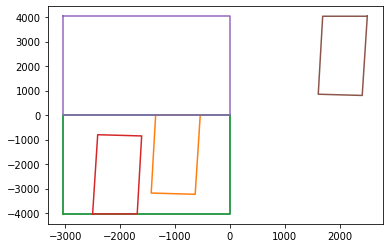

In [12]:
inter_trans = affinity.translate(intersection,-1*cam.exterior.coords[0][0],-1*cam.exterior.coords[0][1])
cam_trans = affinity.translate(cam,-1*cam.exterior.coords[0][0],-1*cam.exterior.coords[0][1])
inter_rot = affinity.rotate(inter_trans,-1*(rot+90),(0,0))
cam_rot = affinity.rotate(cam_trans,-1*(rot+90),(0,0))

cam_flip = affinity.scale(cam_rot,yfact=-1,xfact=-1, origin="centroid")
inter_flip = affinity.scale(inter_rot,yfact=-1,xfact=-1, origin=(cam_rot.centroid))


cam_fnl = affinity.scale(cam_flip,yfact=-1, origin=(0,0))

inter_fnl = affinity.scale(inter_flip,yfact=-1,xfact=-1, origin=(0,0))
minx, miny, maxx, maxy = cam_fnl.bounds
# cam_line = LineString([(minx,maxy),(maxx,miny)])
# cam_fnl2 = cam_fnl.reflect()
# cam_fnl2 = affinity.scale(cam_fnl,yfact=-1, xfact=-1, origin=(cam_fnl.centroid))
# inter_fnl2 = affinity.scale(inter_fnl,yfact=-1,xfact=-1, origin=(cam_fnl.centroid))

#
# inter_fnl = affinity.translate(inter_flip,yoff=3040)
# cam_fnl = affinity.translate(cam_flip,yoff=3040)


# intersection = affinity.translate(intersection,yoff=-1*cam.exterior.coords[1][1])
# cam = affinity.translate(cam,yoff=-1*cam.exterior.coords[1][1])

# cam = affinity.translate(cam,-1*cam.exterior.coords[0][0],-1*cam.exterior.coords[0][1])


# plt.plot(*cam_trans.exterior.xy)
# plt.plot(*inter_trans.exterior.xy)
#
plt.plot(*cam_rot.exterior.xy)
plt.plot(*inter_rot.exterior.xy)
#
plt.plot(*cam_flip.exterior.xy)
plt.plot(*inter_flip.exterior.xy)

plt.plot(*cam_fnl.exterior.xy)
plt.plot(*inter_fnl.exterior.xy)

# plt.plot(*cam_fnl2.exterior.xy)
# plt.plot(*inter_fnl2.exterior.xy)
# plt.plot(*bgd.exterior.xy)

In [13]:
test2 = ImageDraw.Draw(test)
for i in range(len((inter_fnl).exterior.coords)-1):
    test2.line(((inter_fnl).exterior.coords[i] + (inter_fnl).exterior.coords[i+1]), fill="Purple", width=3)
test.save("final_images/test_{}.png".format("test"))
test.show()

In [ ]:
target = Image.open("target_images/cross,Blue,Q,Yellow.png")
tar_poly, rot_box = gen_valid_tar(intersection,target)
# print(gen_valid_tar(intersection,target))
tar_poly = affinity.translate(tar_poly,yoff=4032)
plt.plot(*(tar_poly.envelope).exterior.xy)
plt.plot(*(tar_poly).exterior.xy)
plt.plot(*intersection.exterior.xy)
plt.show()